In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
pth = os.path.join('..', '..')
pth_data = os.path.join(pth, 'data')
pth_in = os.path.join(pth_data, 'modeling', 'landscape')
pth_ref = os.path.join(pth_data, 'refs')
# pth_out = ...

In [3]:
adata_plt = sc.read_h5ad(os.path.join(pth_in, 'development.h5ad'))

In [4]:
fn = os.path.join(pth_in, 'CCCA.h5ad')
adata = sc.read_h5ad(fn)
get_src = lambda src: os.path.split(src)[1]
src = adata.obs.source.apply(get_src)
adata = adata[src != '10X']; adata

View of AnnData object with n_obs × n_vars = 8460 × 856
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'celltype', 'Title', 'Category', 'Disease', 'Technology', 'Samples', 'Cells ', 'Name', 'patient', 'cell_subtype', 'source', 'disease', 'p16_status', 'site', 't_stage', 'n_stage', 'gender', 'race', 'age', 'tobacco_use', 'alcohol_use', 'hpv', 'hpv_score', 'treatment', 'procedure', 'sorting', 'cluster', 'malignant', 'sample_id', 'cell_subtype_clusters', 'tnm_stage', 'viral', 'location', 'cancer_type', 'treatment_exposure', 'treatment_response', 'cell_lineage', 'type', 'clusters_by_authors', 'cell_QCpass', 'is_tumor', 'cell_compartment', 'cluster_assignment', 'metastasis', 'sex', 'prior_enzalutamide', 'prior_abiraterone', 'prior_taxane', 'prior_platinum', 'prior_sipuleucel_T', 'purity', 'has_bulk_RNA', 'cancer_cell_state', 'PSA', 'source_region', 'gleason_score', 'ERG_status', 

In [ ]:
tf = ['Snai1', 'Snai2',
      'Twist1', 'Zeb2',
      'Prrx1', 'Prrx2',
      'Foxc1', 'Foxc2']

In [7]:
X_ref = adata_plt.obsm['X_mesen'].copy()
scale = np.ptp(X_ref, axis = 0)
X_3ca = adata.obsm['X_mesen'].copy()
X_ref = X_ref[np.newaxis, :, :] / scale
X_3ca = X_3ca[:, np.newaxis, :] / scale
d = np.linalg.norm(X_ref - X_3ca, axis = 2)
msk = (d <= .1).astype(float)

In [ ]:
adata_plt.obs[[g + '_Average' for g in tf]] = \
    np.dot(msk.T, adata[:, tf].X.toarray()) / \
        msk.sum(axis = 0)[:, None]

/tmp/ipykernel_1589646/1537763382.py:1: RuntimeWarning: invalid value encountered in divide
  adata_plt.obs[[g + '_Average' for g in tf]] = np.dot(msk.T, adata[:, tf].X.toarray()) / msk.sum(axis = 0)[:, None]


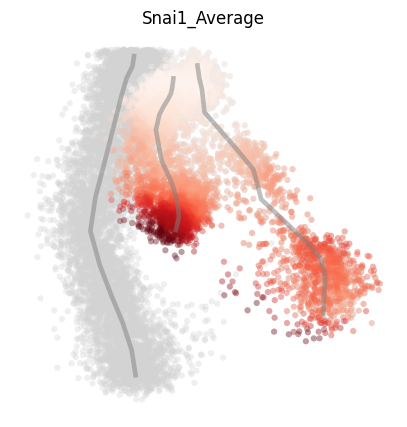

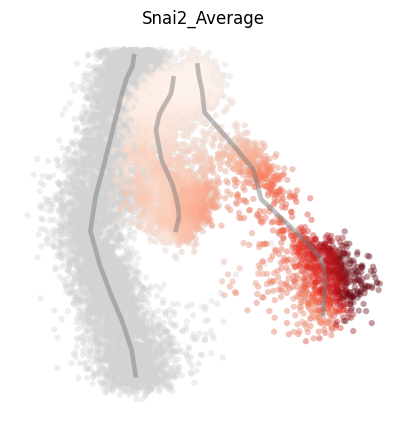

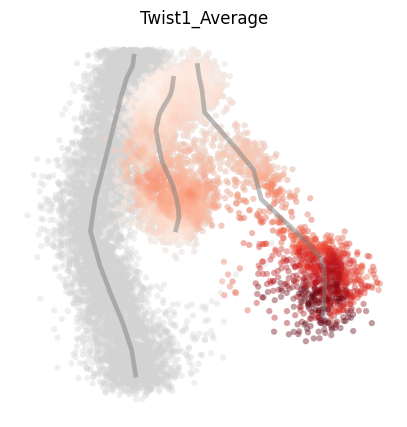

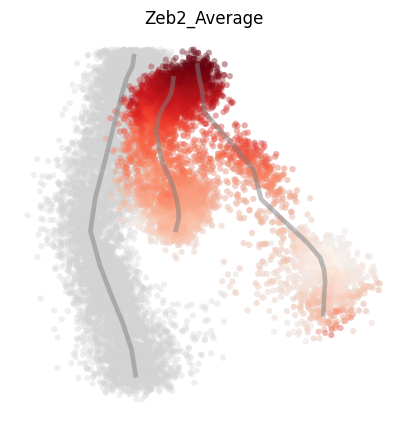

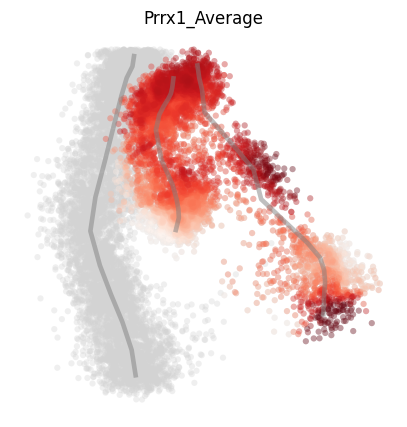

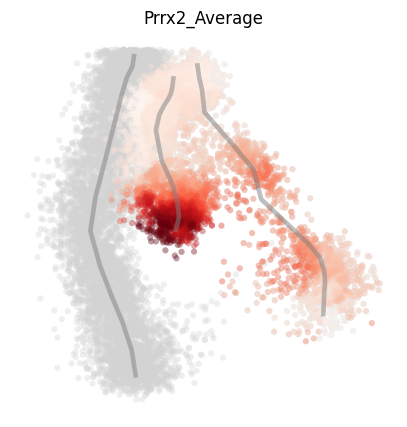

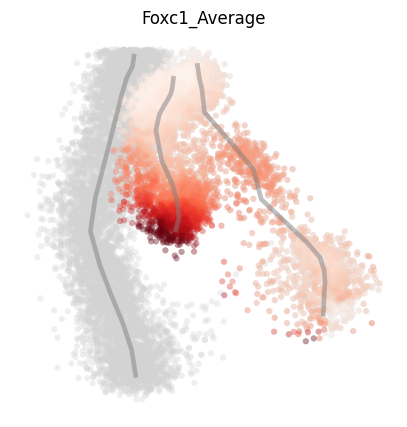

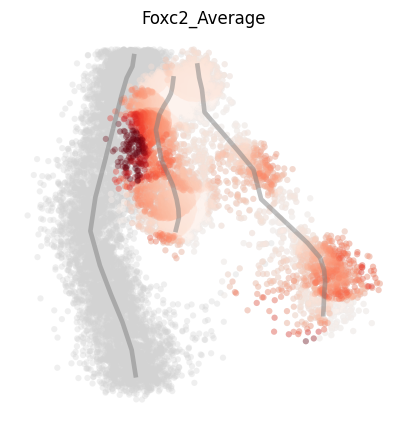

In [32]:
dims = ['X_mesen1', 'X_mesen2']
for g in tf:
    name = g + '_Average'
    # title = 'Metastatic Prostate Cancer'
    # txt = 'He et al., 2021'
    # vmin, vmax = 2, 'p99'

    # plot landscape
    fig, ax = plt.subplots(1, 1, figsize = (5, 5))
    sc.pl.embedding(adata_plt, 'X_mesen', size = 80, alpha = .35,
                    frameon = False, show = False, ax = ax)
    sc.pl.embedding(adata_plt[adata_plt.obs.source != 'GSE162534'],
                    'X_mesen', size = 80, alpha = .35,
                    color = name, vmin = 'p01', vmax = 'p99',
                    cmap = 'Reds', colorbar_loc = None,
                    frameon = False, show = False, ax = ax)

    # draw trajectories
    for src, sdf in adata_plt.obs.groupby('source', observed = True):
        sdf['latent_z_bin'] = pd.qcut(sdf.latent_z, 13)
        sdf = sdf.groupby('latent_z_bin', observed = True)[dims].mean()
        ax.plot(sdf[dims[0]], sdf[dims[1]], lw = 3.33, color = 'gray', alpha = .5)

    ax.invert_yaxis()
    # ax.set_title(title, size = 12)
    # ax.text(.5, -.05, txt, ha = 'center',
    #         transform = ax.transAxes)
    # fn = os.path.join(pth_fig, f'{name}.pdf')
    # plt.savefig(fn, bbox_inches = 'tight')
    plt.show()